In [1]:
from numpy.random import rand
import numpy as np
import sys,os
sys.path.append(os.pardir)
from tools.models.regressors.gaussian_process_regressor import GaussianProcessRegressor

In [2]:
def generate(N,func,window=10,center=0 ,epsilon=1):
    x = (rand(N)-0.5) * window + center
    y = func(x)  + epsilon*np.random.randn(N)
    return x,y

In [105]:
def f(x):
    return x* np.cos(x)

In [147]:
X,y=generate(N=5,func=f,window=50,epsilon=0)

In [148]:
import matplotlib.pyplot as plt
import numpy as np

def plot(X, Y, title,func):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, color="blue", marker="x")
    x = np.linspace(min(X), max(X), 100)
    y =func(x) 
    ax.plot(x, y, color='black')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


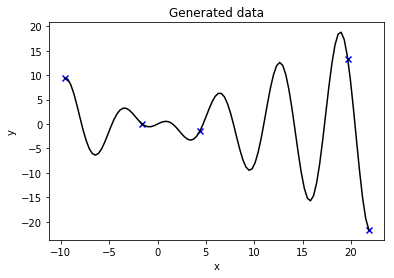

In [149]:
plot(X,y,"Generated data",f)

In [150]:
class GaussianKernel:
    def __init__(self,h):
        self.h = h
        
    def run(self,x,y):
        return np.exp(-np.linalg.norm(x-y)**2/self.h)

In [151]:
kernel=GaussianKernel(h=0.4)
model=GaussianProcessRegressor(kernel=kernel,c=0.1)

In [152]:
model.fit(X,y)

In [153]:
def plot_gp(X, Y, title,func_true,model,k=2):
    """kσ区間"""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, color="blue", marker="o",label="observation")
    x = np.linspace(min(X), max(X), 100)
    y_true = func_true(x)
    mu,sigma = model.calc_mu_sigma(x)
    y_std=np.sqrt(np.diag(sigma))
    mu=mu.flatten()
    ax.plot(x, y_true, color='blue',label="actual")
    ax.plot(x, mu, color='red',label="predict_mean")
    plt.fill_between(x, mu - k*y_std, mu + k*y_std, color="green", alpha=0.5, label="predict_std")
    plt.legend()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

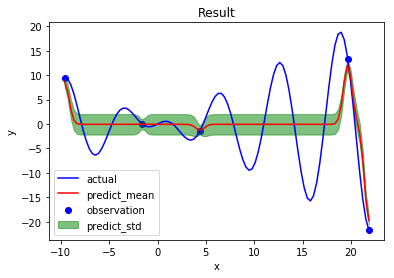

In [154]:
plot_gp(X,y,"Result",f,model)